---
# **Detrending approach for data analysis**

*Omdena Nakuru | Impact of Climate Change on Maize Agricultural Yield in Kenya*


Detrending analysis is a crucial step in time series analysis, particularly when the goal is to identify underlying patterns, assess the relationship between variables, or make accurate predictions.

**Highlighting other Other Patterns:** Once the trend is removed, it becomes easier to identify other patterns, such as seasonality or cycles, that might be present in the data.

**Stationarity Requirements:** Many statistical models, particularly those used in forecasting like ARIMA, assume that the data is stationary—meaning its statistical properties do not change over time. Detrending helps to achieve stationarity by removing the trend component, making the data more suitable for these models.

**Avoiding Spurious Correlations:** If the trend is not removed, any correlation between two time series might simply reflect the trend rather than a true relationship. Detrending helps to prevent misleading conclusions by removing this potential source of spurious correlations.

**Accurate Prediction:** When forecasting future values, it's important to model the underlying patterns rather than the trend alone. By detrending the data, you can build a model that predicts the deviations from the trend, which can then be added back to the trend to forecast the original series accurately.

**Identifying Cycles:** By removing the trend, cyclic patterns become more apparent. This is particularly important in economic or environmental data, where cycles may be present but obscured by a long-term trend.

**Cause and Effect Analysis:** In causal analysis, it’s important to distinguish between long-term trends and causal relationships. Detrending ensures that the analysis focuses on the true relationship between variables, rather than on changes driven by the overall trend.

---

## 1. Packages

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import pymannkendall as mk
from scipy.stats import kendalltau

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
!pip install pymannkendall

## 2. Load dataset

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1tDiD402Jy4oqsvJYUcny77TyxR3mSSCE")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.rename({'Area': 'area',
            'Year': 'year',
            'Area Harvested USDA (1000 HA)': 'area_harvested_usda_1000ha',
            'Production USDA (1000 MT)': 'production_usda_1000ha',
            'Yield USDA (MT/HA)': 'yield_usda_1000ha',
            'Area Harvested FAO (1000 HA)': 'area_harvested_fao_1000ha',
            'Production FAO (1000 MT)': 'production_fao_1000ha',
            'Yield FAO (MT/HA)': 'yield_fao_1000ha',
            'dewpoint_temperature_2m (°C)': 'dew_temp_C',
            'soil_temperature_level_1 (°C)': 'soil_temp_L1_C',
            'soil_temperature_level_2 (°C)': 'soil_temp_L2_C',
            'soil_temperature_level_3 (°C)': 'soil_temp_L3_C',
            'soil_temperature_level_4 (°C)': 'soil_temp_L4_C',
            'surface_net_solar_radiation_sum (J/m^2)': 'irradiation_J_m2',
            'temperature_2m (°C)': 'temp_C',
            'temperature_2m_max (°C)': 'max_temp_C',
            'temperature_2m_min (°C)': 'min_temp_C',
            'total_evaporation_sum (mm)': 'evaporation_mm',
            'total_precipitation_sum (mm)': 'precipitation_era5_mm',
            'u_component_of_wind_10m (m/s)': 'wind_eastward_m_s',
            'v_component_of_wind_10m (m/s)': 'wind_northward_m_s',
            'volumetric_soil_water_layer_1 (vol fraction)': 'soil_water_L1_fraction',
            'volumetric_soil_water_layer_2 (vol fraction)': 'soil_water_L2_fraction',
            'volumetric_soil_water_layer_3 (vol fraction)': 'soil_water_L3_fraction',
            'volumetric_soil_water_layer_4 (vol fraction)': 'soil_water_L4_fraction',
            'precipitation (mm)': 'precipitation_chirps_mm'},
            axis=1, inplace=True)

df

,area,year,area_harvested_usda_1000ha,production_usda_1000ha,yield_usda_1000ha,area_harvested_fao_1000ha,production_fao_1000ha,yield_fao_1000ha,dew_temp_C,soil_temp_L1_C,...,min_temp_C,evaporation_mm,precipitation_era5_mm,wind_eastward_m_s,wind_northward_m_s,soil_water_L1_fraction,soil_water_L2_fraction,soil_water_L3_fraction,soil_water_L4_fraction,precipitation_chirps_mm
0,Kenya,1960,1050.0,1143.0,1.09,NaN,NaN,NaN,15.924320,26.955911,...,18.246775,-696.098739,816.850792,-1.715802,1.628881,0.193338,0.219460,0.216491,0.216762,NaN
1,Kenya,1961,1050.0,1270.0,1.21,750.000,940.0,1.2533,16.561342,26.655510,...,18.196874,-784.876892,1083.460766,-1.451530,1.423117,0.216277,0.237011,0.223270,0.212823,NaN
2,Kenya,1962,1150.0,1397.0,1.21,900.000,1100.0,1.2222,15.536051,26.981031,...,17.842572,-673.848205,737.130704,-1.548178,1.426887,0.184166,0.215835,0.228034,0.227262,NaN
3,Kenya,1963,1133.0,1400.0,1.24,1000.000,1250.0,1.2500,16.184495,26.623490,...,18.099040,-717.592738,997.240301,-1.428209,1.469092,0.205768,0.229388,0.226266,0.224308,NaN
4,Kenya,1964,1133.0,1270.0,1.12,1050.000,1230.0,1.1714,15.905193,26.726709,...,18.048843,-685.274141,753.909880,-1.537679,1.557983,0.190428,0.220775,0.227764,0.225981,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Kenya,2019,2296.0,3582.0,1.56,2296.174,3582.0,1.5600,16.314118,28.260035,...,19.366050,-648.094642,845.639961,-1.682754,1.572516,0.189986,0.216753,0.207271,0.196237,833.360528
60,Kenya,2020,2136.0,3789.0,1.77,2135.741,3789.0,1.7741,16.765946,27.610828,...,18.967969,-744.055853,927.540746,-1.398748,1.594456,0.199087,0.230600,0.233984,0.216844,843.606339
61,Kenya,2021,2169.0,3303.0,1.52,2168.603,3303.0,1.5231,15.184149,28.509986,...,19.003308,-462.756505,469.121226,-1.797343,1.746816,0.156057,0.188207,0.191949,0.205974,542.155128
62,Kenya,2022,2156.0,3087.0,1.43,2156.376,3087.0,1.4316,14.935194,28.490245,...,18.822569,-410.980098,409.495392,-1.818152,1.744263,0.148988,0.182085,0.181806,0.193327,531.879950


In [ ]:
# Filter years with available precipitation data from CHIRPS
filtered_df = df[df['precipitation_chirps_mm'].notna()]

# FAO dataset does not have data for 2023. Copy data from USDA dataset
filtered_df.iloc[-1, 5] = filtered_df.iloc[-1, 2]
filtered_df.iloc[-1, 6] = filtered_df.iloc[-1, 3]
filtered_df.iloc[-1, 7] = filtered_df.iloc[-1, 4]
filtered_df

,area,year,area_harvested_usda_1000ha,production_usda_1000ha,yield_usda_1000ha,area_harvested_fao_1000ha,production_fao_1000ha,yield_fao_1000ha,dew_temp_C,soil_temp_L1_C,...,min_temp_C,evaporation_mm,precipitation_era5_mm,wind_eastward_m_s,wind_northward_m_s,soil_water_L1_fraction,soil_water_L2_fraction,soil_water_L3_fraction,soil_water_L4_fraction,precipitation_chirps_mm
21,Kenya,1981,1690.0,2501.0,1.48,1120.000,1768.00000,1.5786,16.172681,27.187211,...,18.436780,-672.147917,828.961725,-1.780923,1.491937,0.193372,0.218588,0.216844,0.202680,686.870498
22,Kenya,1982,1720.0,2350.0,1.37,1208.000,2502.00000,2.0712,16.453311,27.081270,...,18.542266,-712.194621,845.199802,-1.698256,1.441150,0.202672,0.223104,0.210453,0.201425,720.246722
23,Kenya,1983,1722.0,2030.0,1.18,1300.000,2300.00000,1.7692,16.538267,27.676079,...,18.929096,-645.161029,741.277000,-1.728864,1.557011,0.183731,0.209353,0.209693,0.202055,479.511974
24,Kenya,1984,1630.0,1729.0,1.06,985.000,1422.00000,1.4437,15.040051,27.417119,...,18.255918,-564.429475,598.087327,-1.924218,1.581042,0.173440,0.198831,0.194561,0.196264,482.326615
25,Kenya,1985,1790.0,2750.0,1.54,1411.000,2430.00000,1.7222,15.667531,26.798185,...,18.210716,-662.722743,782.203460,-1.715521,1.579468,0.192385,0.219004,0.217130,0.200461,576.790508
26,Kenya,1986,1795.0,2825.0,1.57,1424.600,2898.00000,2.0343,15.811958,27.041687,...,18.288375,-641.643386,805.301125,-1.713956,1.560909,0.190789,0.214812,0.207696,0.200231,603.805893
27,Kenya,1987,1600.0,2450.0,1.53,1406.956,2415.60000,1.7169,15.836391,27.888538,...,18.662033,-608.403018,652.824820,-1.809084,1.559020,0.175240,0.207461,0.209545,0.202538,498.166759
28,Kenya,1988,1820.0,2860.0,1.57,1450.939,2761.20000,1.9030,16.151424,27.713242,...,18.768470,-612.431796,793.333549,-1.748072,1.679719,0.183695,0.207893,0.203053,0.199188,671.571476
29,Kenya,1989,1815.0,2836.0,1.56,1420.000,2630.70000,1.8526,15.909105,26.866639,...,18.203255,-676.141895,804.720762,-1.626811,1.541790,0.194810,0.219715,0.212400,0.201180,659.652501
30,Kenya,1990,1775.0,2200.0,1.24,1380.000,2289.60000,1.6591,16.451220,27.068485,...,18.377123,-707.581242,820.400320,-1.642696,1.606122,0.197166,0.221392,0.217706,0.203831,694.287532


## 3. Trend analysis: Mann-Kendall Trend Test

In [ ]:
def highlight_significant_values(val):
    """Highlights values in bold."""
    if val < 0.05:
        return f'<b>{val:.3f}</b>'
    else:
        return f'{val:.3f}'

### Provide a table containing  Mann-Kendall Test results
def mann_kendall_results(df):

    mann_kendall_results = []

    # Group by the 'county' column
    grouped = df.groupby('area')

    # Iterate over each group
    for area, group in grouped:
        # Iterate over each column (variable) starting from the 3rd column
        for col in group.columns[2:]:
            result = mk.original_test(group[col])
            mann_kendall_results.append({
                'area': area,
                'variable': col,
                'trend': result.trend,
                'slope': result.slope,
                'intercept': result.intercept,
                'p': result.p,
                'Tau': result.Tau,
            })

    df_mann_kendall_results = pd.DataFrame(mann_kendall_results)

    return df_mann_kendall_results

In [ ]:
trend_analysis_kenya_1981_2023 = mann_kendall_results(filtered_df[2:])
styled_df = trend_analysis_kenya_1981_2023.style.format(highlight_significant_values, subset=['p'])
styled_df

,area,variable,trend,slope,intercept,p,Tau
0,Kenya,area_harvested_usda_1000ha,increasing,14.107955,1507.840909,0.000,0.430488
1,Kenya,production_usda_1000ha,increasing,37.060185,2083.796296,0.000,0.521951
2,Kenya,yield_usda_1000ha,increasing,0.007454,1.390926,0.007,0.293902
3,Kenya,area_harvested_fao_1000ha,increasing,26.659056,1082.122889,0.000,0.750000
4,Kenya,production_fao_1000ha,increasing,38.579679,1989.606429,0.000,0.536585
5,Kenya,yield_fao_1000ha,no trend,-0.003886,1.769914,0.189,-0.143902
6,Kenya,dew_temp_C,no trend,-0.005516,15.830245,0.493,-0.075610
7,Kenya,soil_temp_L1_C,increasing,0.027254,27.130273,0.000,0.507317
8,Kenya,soil_temp_L2_C,increasing,0.027151,27.096819,0.000,0.514634
9,Kenya,soil_temp_L3_C,increasing,0.027126,27.072812,0.000,0.529268


## 4. Detrending variables

In [ ]:
# Create new dataframes for detrended variables
df_trend = filtered_df[['area', 'year']]
df_detrended = filtered_df[['area', 'year']]

# Loop to detrend all variables
for col in filtered_df.columns[2:]:

    # Fit a linear regression model to capture the trend
    model = LinearRegression().fit(filtered_df.year.values.reshape(-1, 1), filtered_df[col].values)

    # Predict the trend based on the fitted model
    trend = model.predict(filtered_df.year.values.reshape(-1, 1))

    # De-trend the maize production data by subtracting the trend from the original data
    detrended = filtered_df[col].values - trend

    # Add detrended production to the DataFrame for easier analysis
    df_trend[str(col)] = trend
    df_detrended[str(col)] = detrended

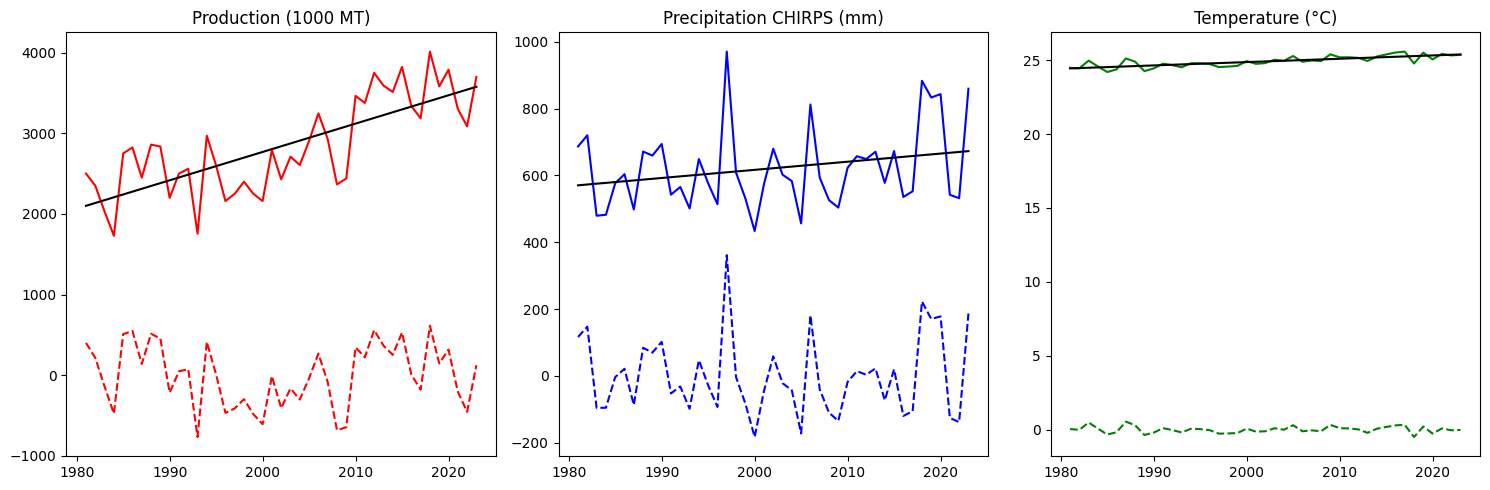

In [ ]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot data on each subplot
axs[0].plot(filtered_df.year, filtered_df.production_usda_1000ha, color='red', label='production')
axs[0].plot(df_detrended.year, df_detrended.production_usda_1000ha, color='red', label='production', linestyle='--')
axs[0].plot(df_trend.year, df_trend.production_usda_1000ha, color='black', label='Trend')
axs[0].set_title('Production (1000 MT)')

axs[1].plot(filtered_df.year, filtered_df.precipitation_chirps_mm, color='blue', label='production')
axs[1].plot(df_detrended.year, df_detrended.precipitation_chirps_mm, color='blue', label='production', linestyle='--')
axs[1].plot(df_trend.year, df_trend.precipitation_chirps_mm, color='black', label='Trend')
axs[1].set_title('Precipitation CHIRPS (mm)')

axs[2].plot(filtered_df.year, filtered_df.temp_C, color='green', label='yield')
axs[2].plot(df_detrended.year, df_detrended.temp_C, color='green', label='yield', linestyle='--')
axs[2].plot(df_trend.year, df_trend.temp_C, color='black', label='Trend')
axs[2].set_title('Temperature (°C)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Here is the code if you want to inspect all detrended variables

In [ ]:
'''
# Create a figure with subplots dynamically based on the number of variables

variables = filtered_df.columns[2:]
n_vars = len(variables)
fig, axs = plt.subplots(n_vars, 1, figsize=(8, 5*n_vars))

# Loop over variables to create each subplot
for i, var in enumerate(variables):
    axs[i].plot(filtered_df.year, filtered_df[var], label=f'{var} (original)', color='red')
    axs[i].plot(df_detrended.year, df_detrended[var], label=f'{var} (detrended)', linestyle='--', color='blue')
    axs[i].plot(df_trend.year, df_trend[var], label=f'{var} (trend)', color='black')

    # Set titles dynamically based on the variable name
    axs[i].set_title(f'{var.replace("_", " ").title()}')

    # Add a legend
    axs[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
'''

'\n# Create a figure with subplots dynamically based on the number of variables\n\nvariables = filtered_df.columns[2:]\nn_vars = len(variables)\nfig, axs = plt.subplots(n_vars, 1, figsize=(8, 5*n_vars))\n\n# Loop over variables to create each subplot\nfor i, var in enumerate(variables):\n    axs[i].plot(filtered_df.year, filtered_df[var], label=f\'{var} (original)\', color=\'red\')\n    axs[i].plot(df_detrended.year, df_detrended[var], label=f\'{var} (detrended)\', linestyle=\'--\', color=\'blue\')\n    axs[i].plot(df_trend.year, df_trend[var], label=f\'{var} (trend)\', color=\'black\')\n\n    # Set titles dynamically based on the variable name\n    axs[i].set_title(f\'{var.replace("_", " ").title()}\')\n\n    # Add a legend\n    axs[i].legend()\n\n# Adjust spacing between subplots\nplt.tight_layout()\n\n# Show the plot\nplt.show()\n'

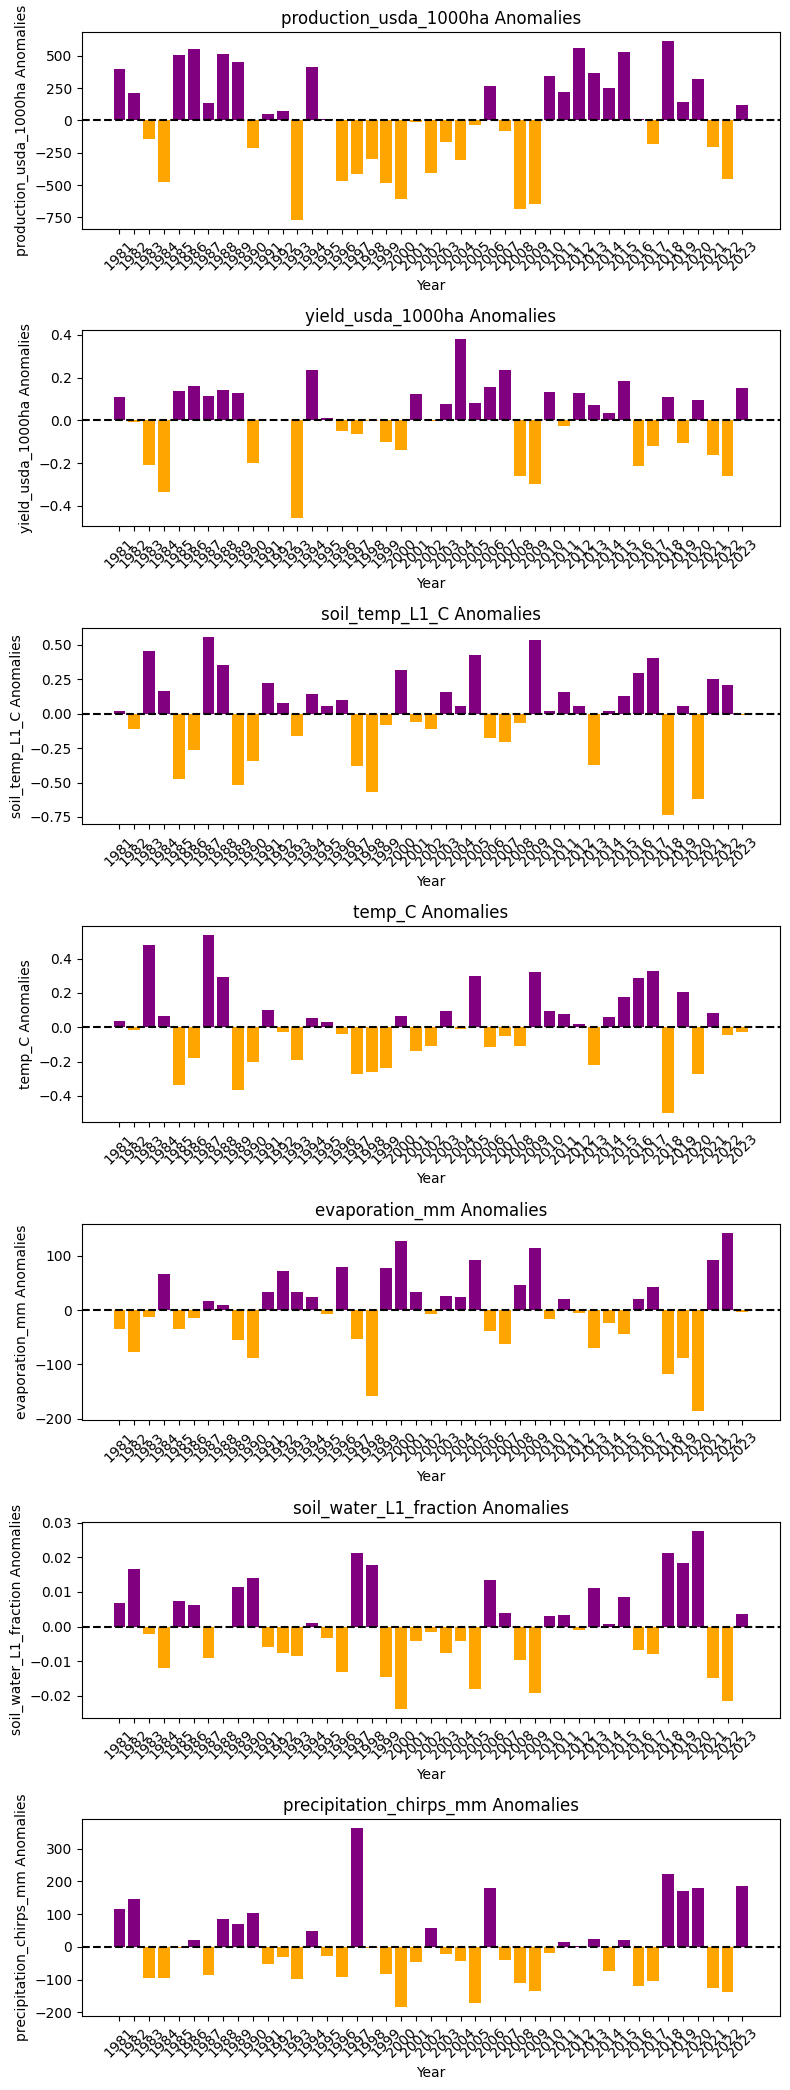

In [ ]:
# List of variables you want to plot as anomalies (replace with actual column names from your dataframe)
variables = ['production_usda_1000ha',
        'yield_usda_1000ha',
        'soil_temp_L1_C',
        'temp_C',
        'evaporation_mm',
        'soil_water_L1_fraction',
        'precipitation_chirps_mm']

# Create a figure with subplots dynamically based on the number of variables
n_vars = len(variables)
fig, axs = plt.subplots(n_vars, 1, figsize=(8, 3* n_vars))  # Adjust size dynamically

# If there's only one variable, axs would not be an array, so we handle it
if n_vars == 1:
    axs = [axs]

# Loop over each variable and create bar plots
for i, var in enumerate(variables):
    ax = axs[i]
    colors = np.where(df_detrended[var] > 0, 'purple', 'orange')
    ax.bar(df_detrended['year'], df_detrended[var], color=colors)
    ax.axhline(0, color='black', linestyle='--')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'{var} Anomalies')
    ax.set_xticks(df_detrended['year'])
    ax.set_xticklabels(df_detrended['year'], rotation=45)
    ax.set_title(f'{var} Anomalies')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

## 5. Bivariated relationships

### 5.1. Maize production

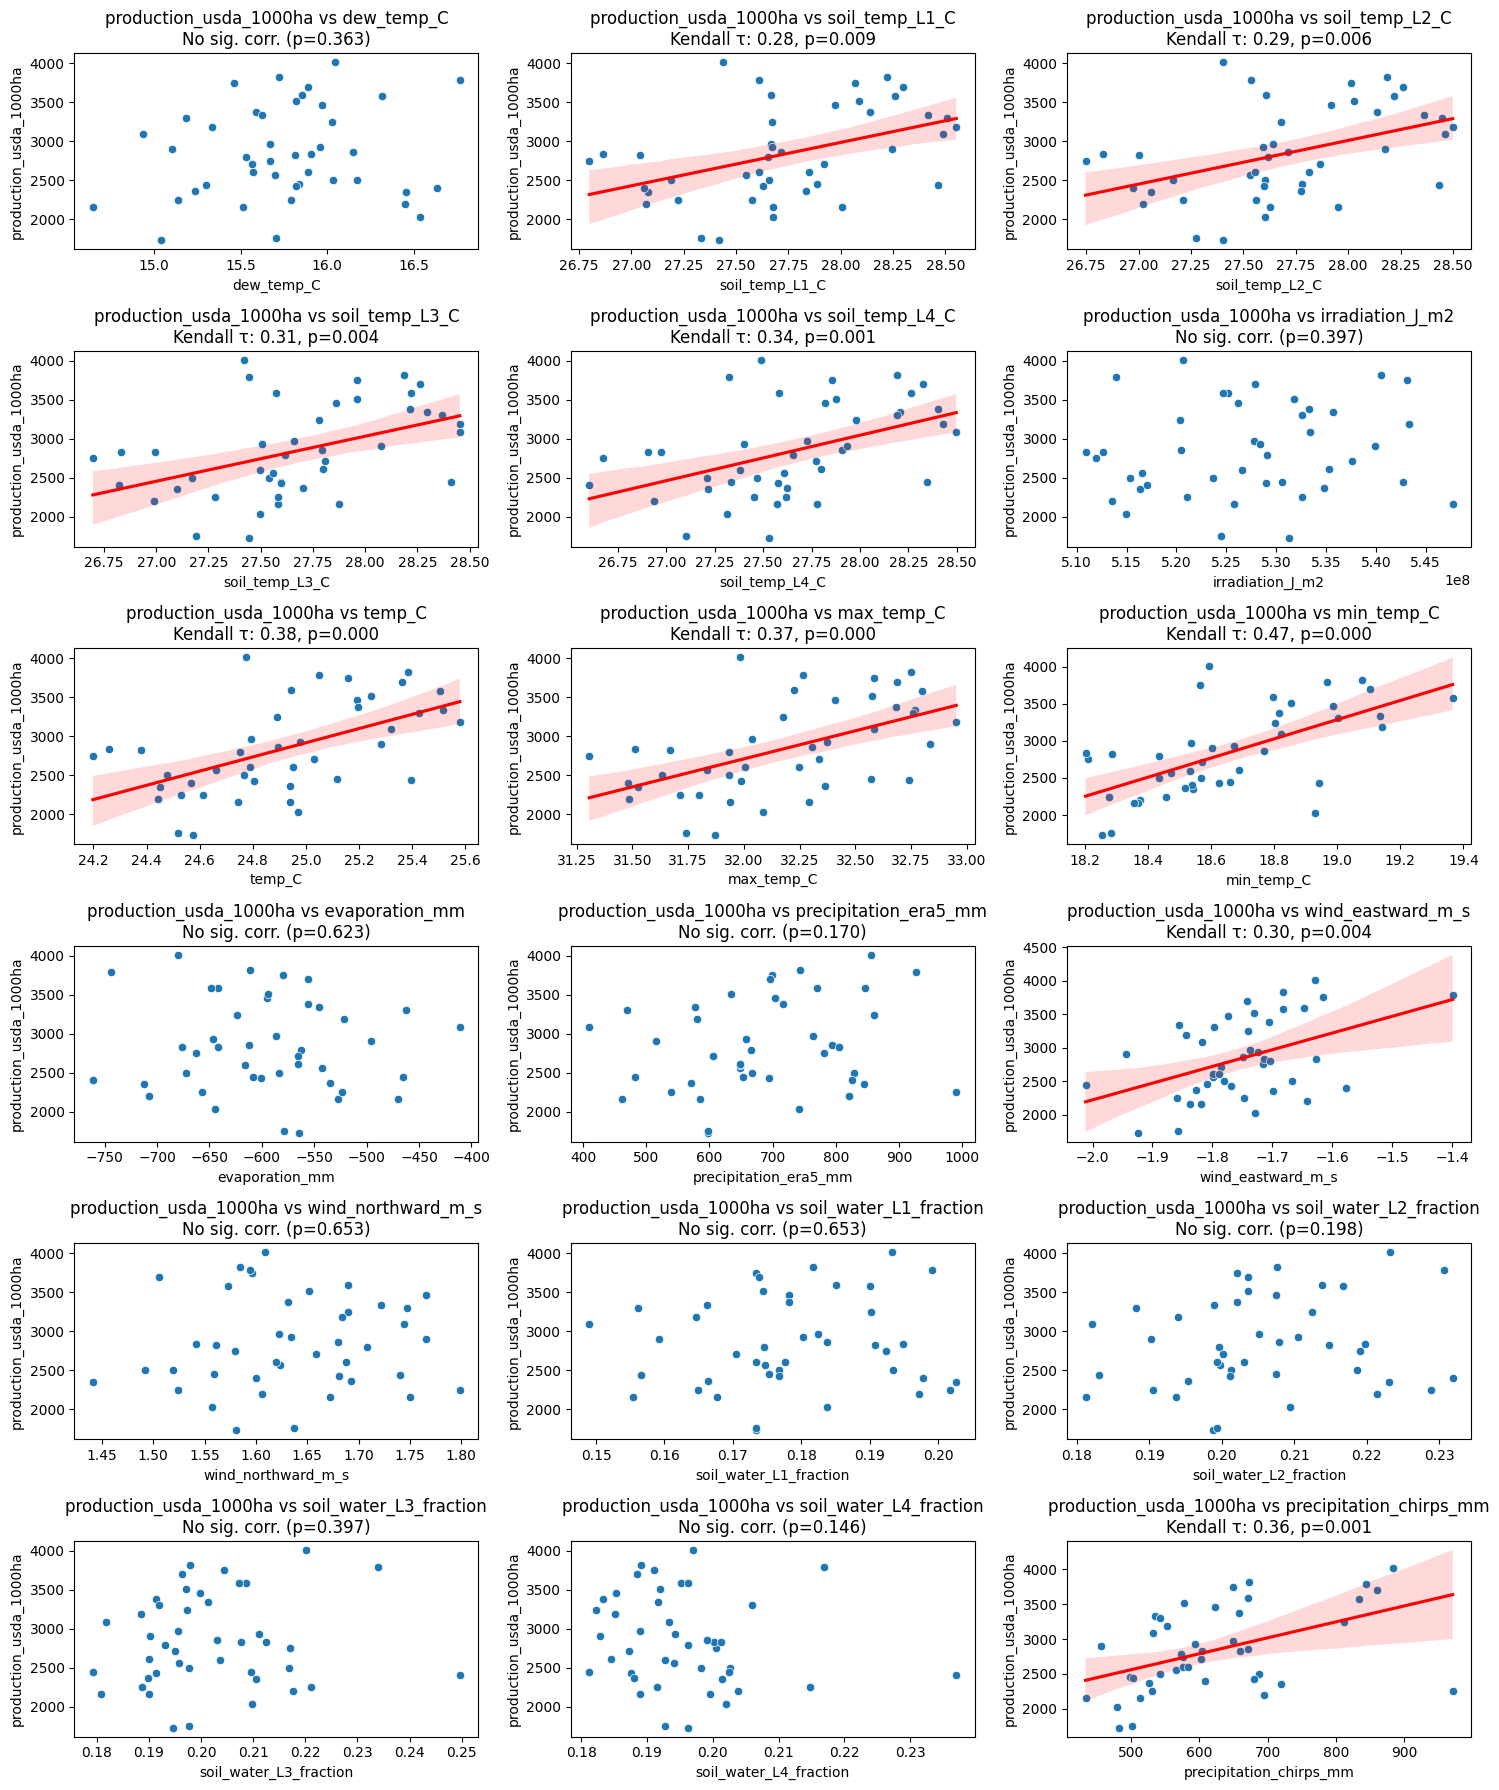

In [ ]:
# List of climate variables and target variable

df_fig = filtered_df.copy()

climate_vars = ['dew_temp_C',
       'soil_temp_L1_C', 'soil_temp_L2_C', 'soil_temp_L3_C', 'soil_temp_L4_C',
       'irradiation_J_m2', 'temp_C', 'max_temp_C', 'min_temp_C',
       'evaporation_mm', 'precipitation_era5_mm', 'wind_eastward_m_s',
       'wind_northward_m_s', 'soil_water_L1_fraction',
       'soil_water_L2_fraction', 'soil_water_L3_fraction',
       'soil_water_L4_fraction', 'precipitation_chirps_mm']

target_var = 'production_usda_1000ha'  # Dependent variable

# Define the grid size (e.g., 2 rows, 3 columns for 6 variables)
n_vars = len(climate_vars)
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(n_vars / n_cols))  # Number of rows, calculated based on number of variables

# Create subplots grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_vars))  # Adjust size accordingly
axs = axs.flatten()  # Flatten to easily iterate over the axes

# Loop over the climate variables and create scatter plots in each subplot
for i, var in enumerate(climate_vars):
    # Calculate Kendall correlation and p-value
    tau, p_value = kendalltau(df_fig[var], df_fig[target_var])

    # Plot scatter plot
    sns.scatterplot(x=df_fig[var], y=df_fig[target_var], ax=axs[i])

    # Add trend line only if the correlation is significant (p < 0.05)
    if p_value < 0.05:
        sns.regplot(x=df_fig[var], y=df_fig[target_var], ax=axs[i],
                    scatter=False, line_kws={"color": "red"})  # Add trend line

    # Add title with Kendall correlation if significant
    if p_value < 0.05:
        axs[i].set_title(f'{target_var} vs {var}\nKendall τ: {tau:.2f}, p={p_value:.3f}')
    else:
        axs[i].set_title(f'{target_var} vs {var}\nNo sig. corr. (p={p_value:.3f})')

    axs[i].set_xlabel(var)
    axs[i].set_ylabel(target_var)

# Remove any unused subplots if the number of variables doesn't fill the grid
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### 5.2. Maize production (detrended variables)

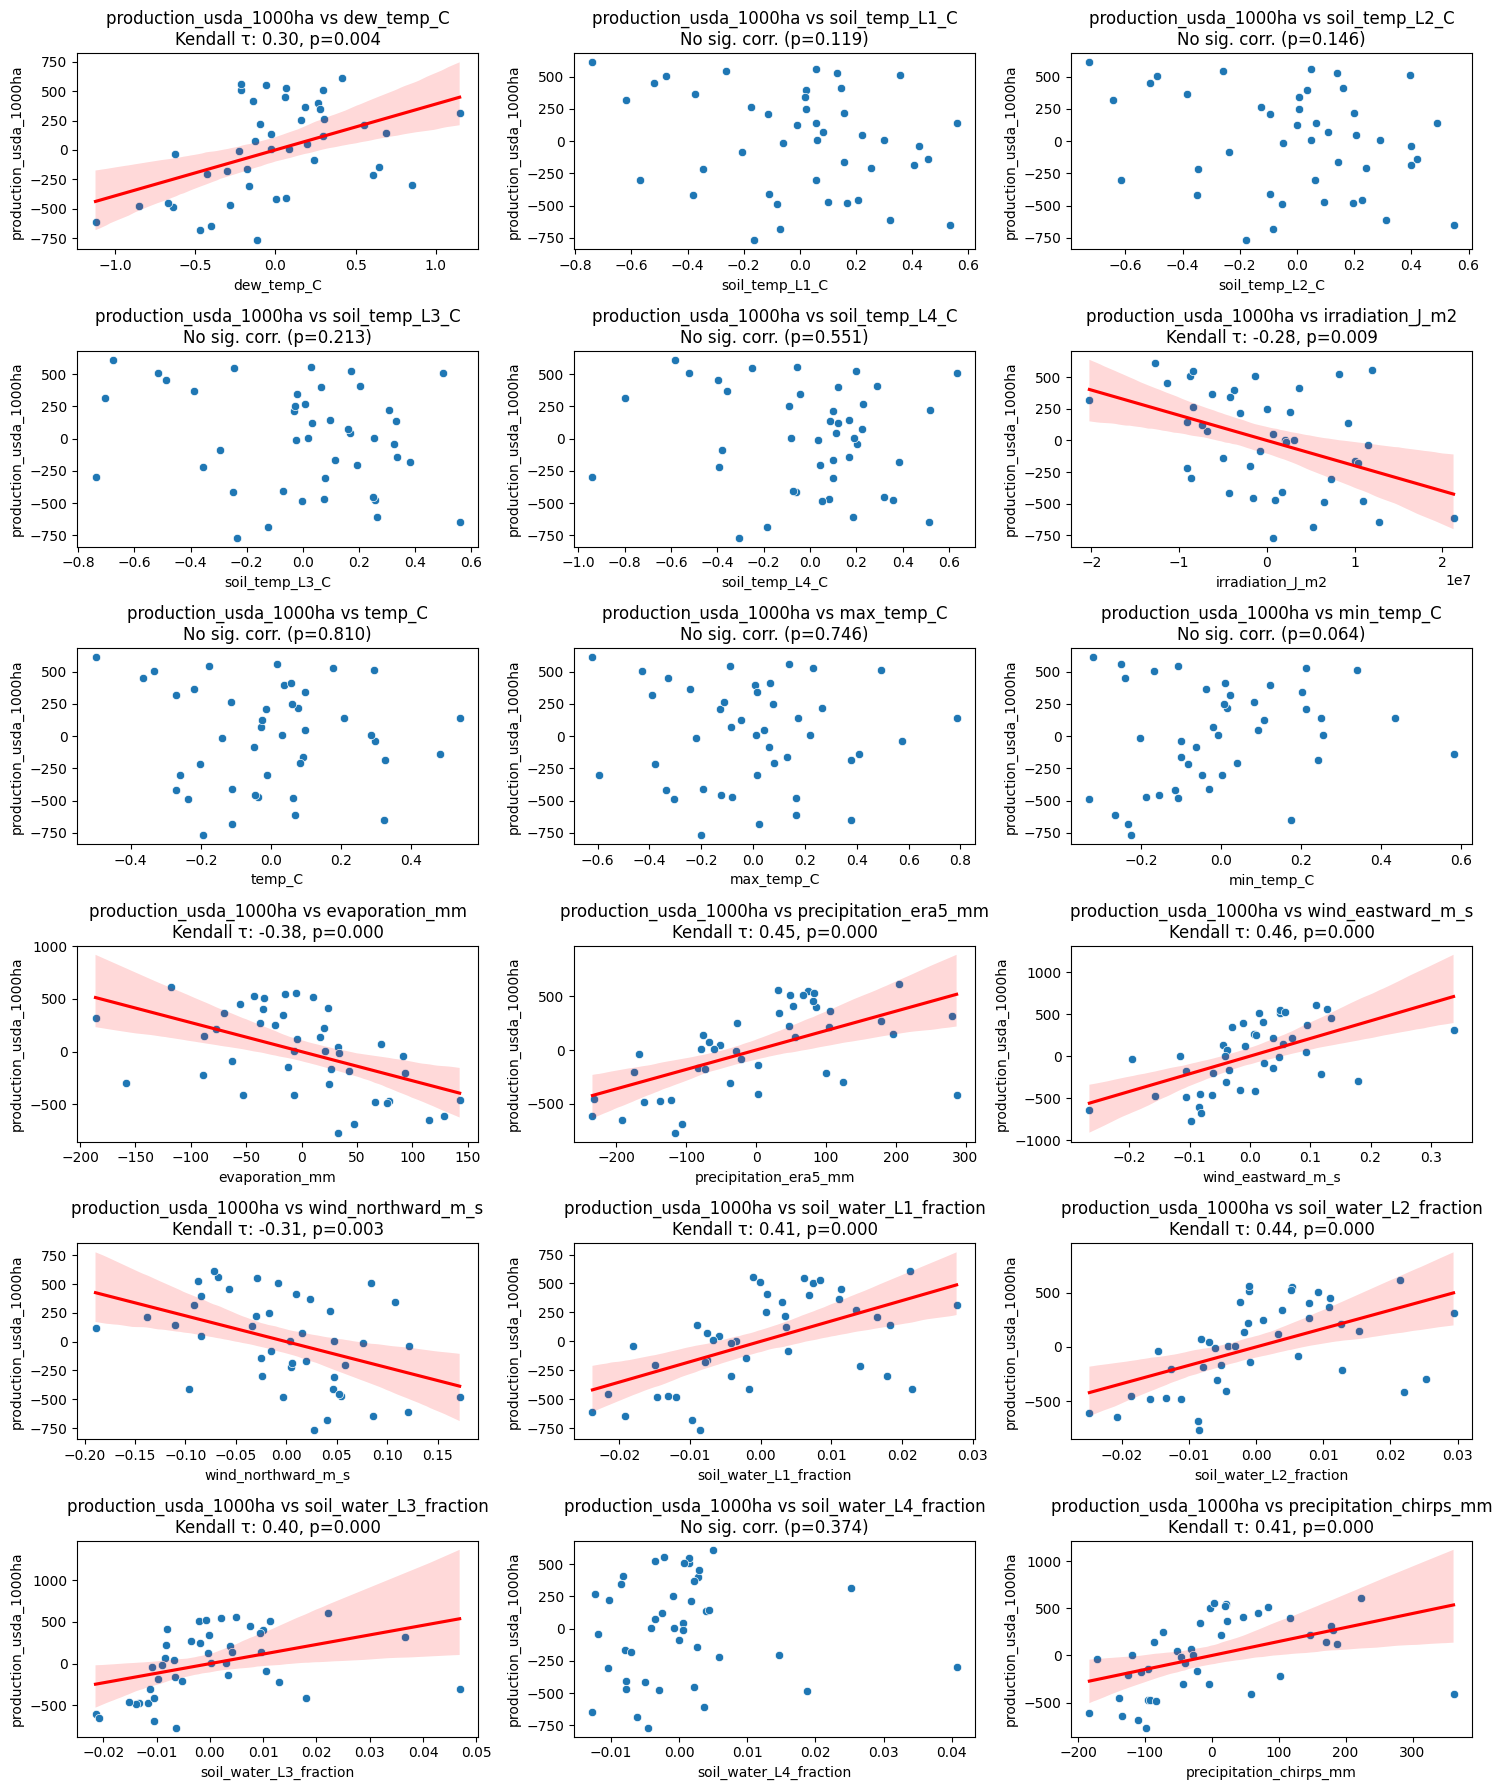

In [ ]:
# List of climate variables and target variable

df_fig = df_detrended.copy()

climate_vars = ['dew_temp_C',
       'soil_temp_L1_C', 'soil_temp_L2_C', 'soil_temp_L3_C', 'soil_temp_L4_C',
       'irradiation_J_m2', 'temp_C', 'max_temp_C', 'min_temp_C',
       'evaporation_mm', 'precipitation_era5_mm', 'wind_eastward_m_s',
       'wind_northward_m_s', 'soil_water_L1_fraction',
       'soil_water_L2_fraction', 'soil_water_L3_fraction',
       'soil_water_L4_fraction', 'precipitation_chirps_mm']

target_var = 'production_usda_1000ha'  # Dependent variable

# Define the grid size (e.g., 2 rows, 3 columns for 6 variables)
n_vars = len(climate_vars)
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(n_vars / n_cols))  # Number of rows, calculated based on number of variables

# Create subplots grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_vars))  # Adjust size accordingly
axs = axs.flatten()  # Flatten to easily iterate over the axes

# Loop over the climate variables and create scatter plots in each subplot
for i, var in enumerate(climate_vars):
    # Calculate Kendall correlation and p-value
    tau, p_value = kendalltau(df_fig[var], df_fig[target_var])

    # Plot scatter plot
    sns.scatterplot(x=df_fig[var], y=df_fig[target_var], ax=axs[i])

    # Add trend line only if the correlation is significant (p < 0.05)
    if p_value < 0.05:
        sns.regplot(x=df_fig[var], y=df_fig[target_var], ax=axs[i],
                    scatter=False, line_kws={"color": "red"})  # Add trend line

    # Add title with Kendall correlation if significant
    if p_value < 0.05:
        axs[i].set_title(f'{target_var} vs {var}\nKendall τ: {tau:.2f}, p={p_value:.3f}')
    else:
        axs[i].set_title(f'{target_var} vs {var}\nNo sig. corr. (p={p_value:.3f})')

    axs[i].set_xlabel(var)
    axs[i].set_ylabel(target_var)

# Remove any unused subplots if the number of variables doesn't fill the grid
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### 5.3. Yield

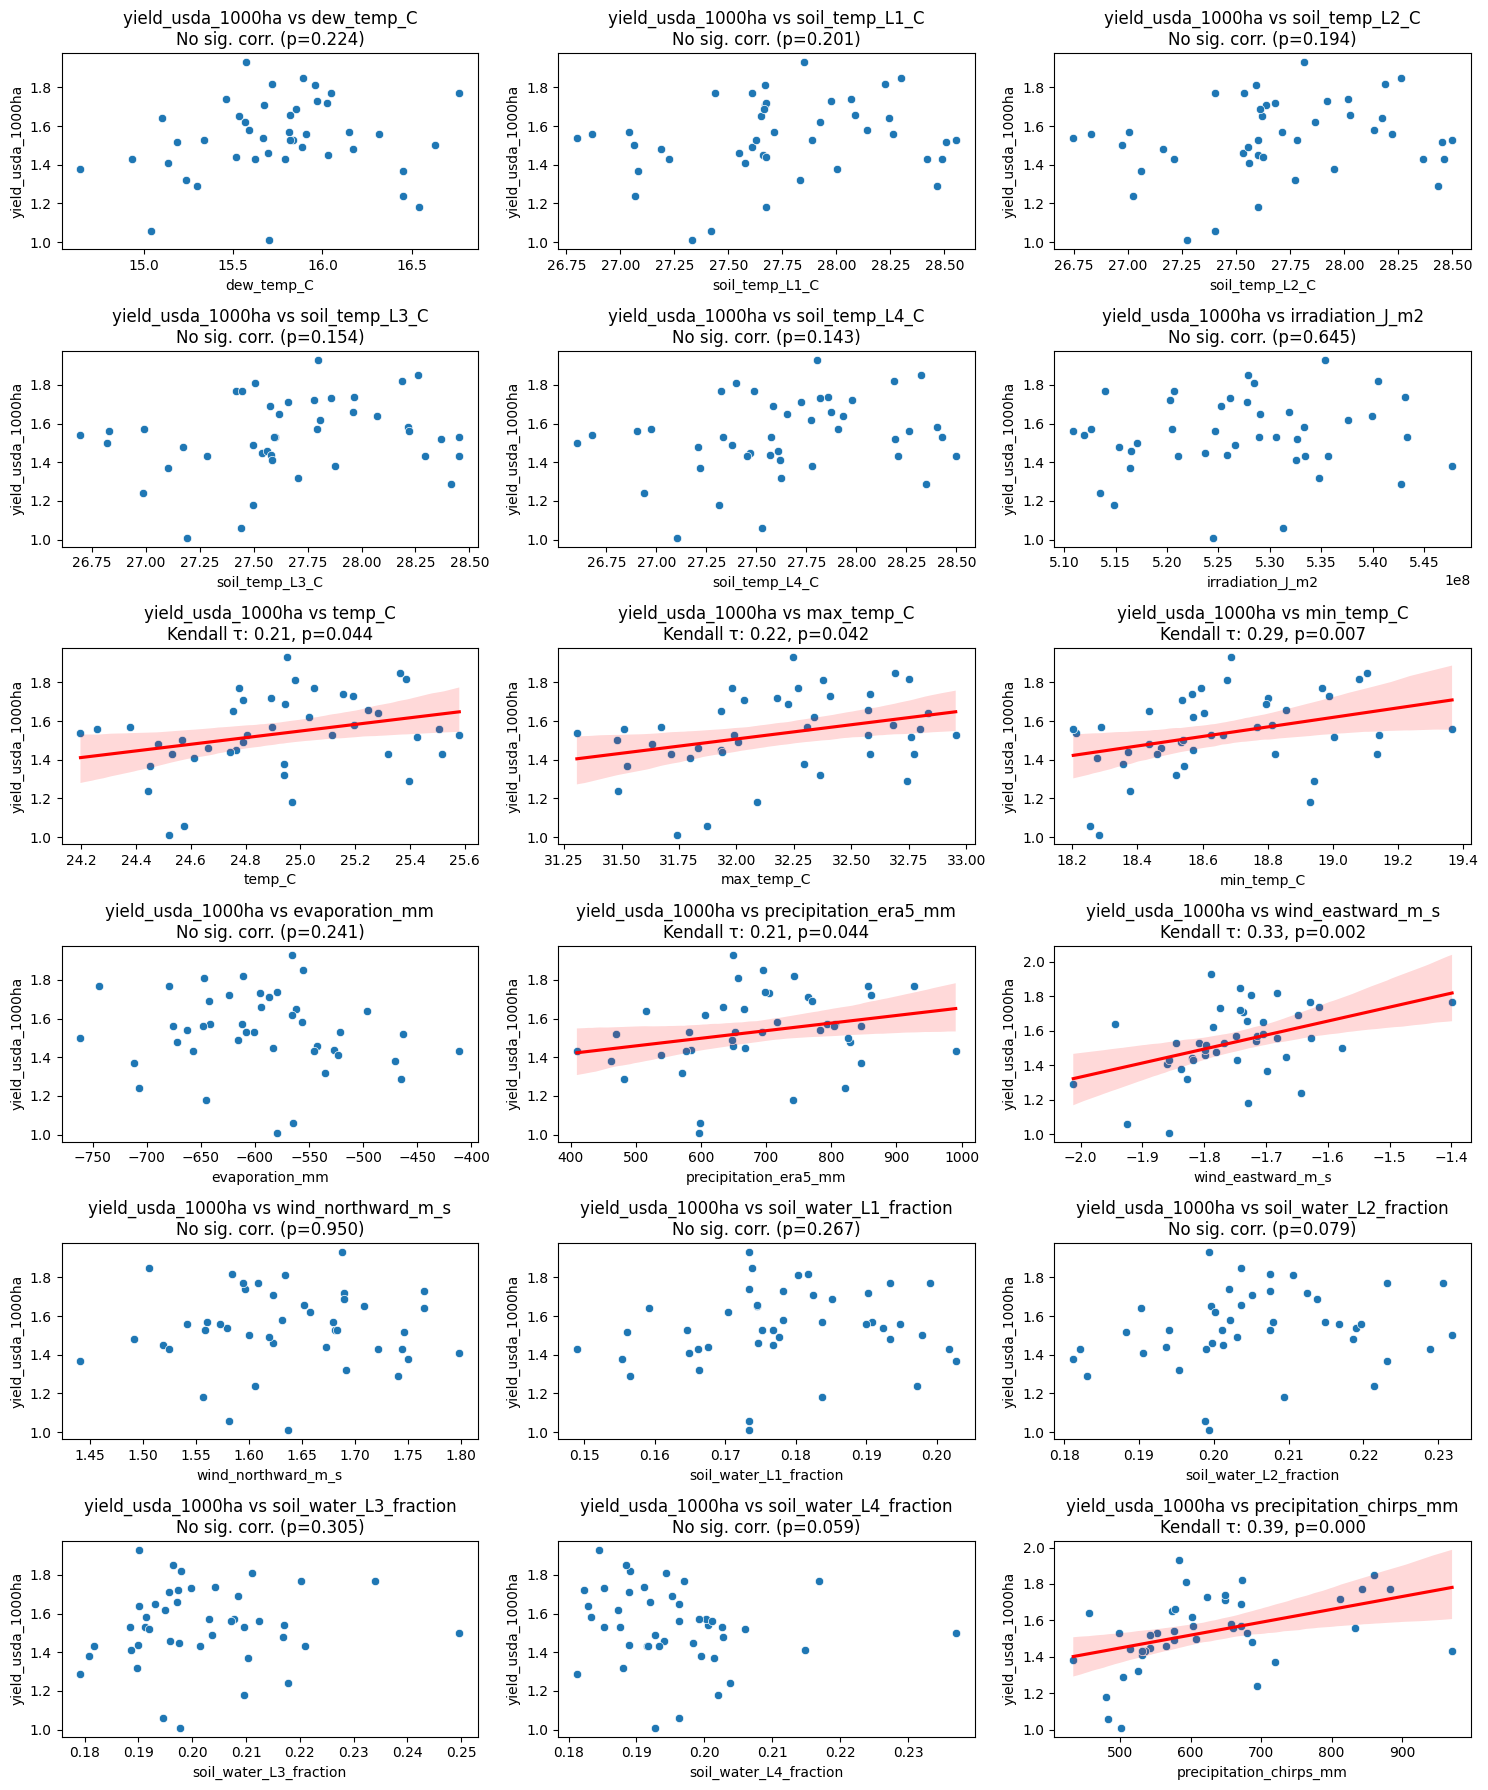

In [ ]:
# List of climate variables and target variable

df_fig = filtered_df.copy()

climate_vars = ['dew_temp_C',
       'soil_temp_L1_C', 'soil_temp_L2_C', 'soil_temp_L3_C', 'soil_temp_L4_C',
       'irradiation_J_m2', 'temp_C', 'max_temp_C', 'min_temp_C',
       'evaporation_mm', 'precipitation_era5_mm', 'wind_eastward_m_s',
       'wind_northward_m_s', 'soil_water_L1_fraction',
       'soil_water_L2_fraction', 'soil_water_L3_fraction',
       'soil_water_L4_fraction', 'precipitation_chirps_mm']

target_var = 'yield_usda_1000ha'  # Dependent variable

# Define the grid size (e.g., 2 rows, 3 columns for 6 variables)
n_vars = len(climate_vars)
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(n_vars / n_cols))  # Number of rows, calculated based on number of variables

# Create subplots grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_vars))  # Adjust size accordingly
axs = axs.flatten()  # Flatten to easily iterate over the axes

# Loop over the climate variables and create scatter plots in each subplot
for i, var in enumerate(climate_vars):
    # Calculate Kendall correlation and p-value
    tau, p_value = kendalltau(df_fig[var], df_fig[target_var])

    # Plot scatter plot
    sns.scatterplot(x=df_fig[var], y=df_fig[target_var], ax=axs[i])

    # Add trend line only if the correlation is significant (p < 0.05)
    if p_value < 0.05:
        sns.regplot(x=df_fig[var], y=df_fig[target_var], ax=axs[i],
                    scatter=False, line_kws={"color": "red"})  # Add trend line

    # Add title with Kendall correlation if significant
    if p_value < 0.05:
        axs[i].set_title(f'{target_var} vs {var}\nKendall τ: {tau:.2f}, p={p_value:.3f}')
    else:
        axs[i].set_title(f'{target_var} vs {var}\nNo sig. corr. (p={p_value:.3f})')

    axs[i].set_xlabel(var)
    axs[i].set_ylabel(target_var)

# Remove any unused subplots if the number of variables doesn't fill the grid
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### 5.4. Yield (detrended variables)

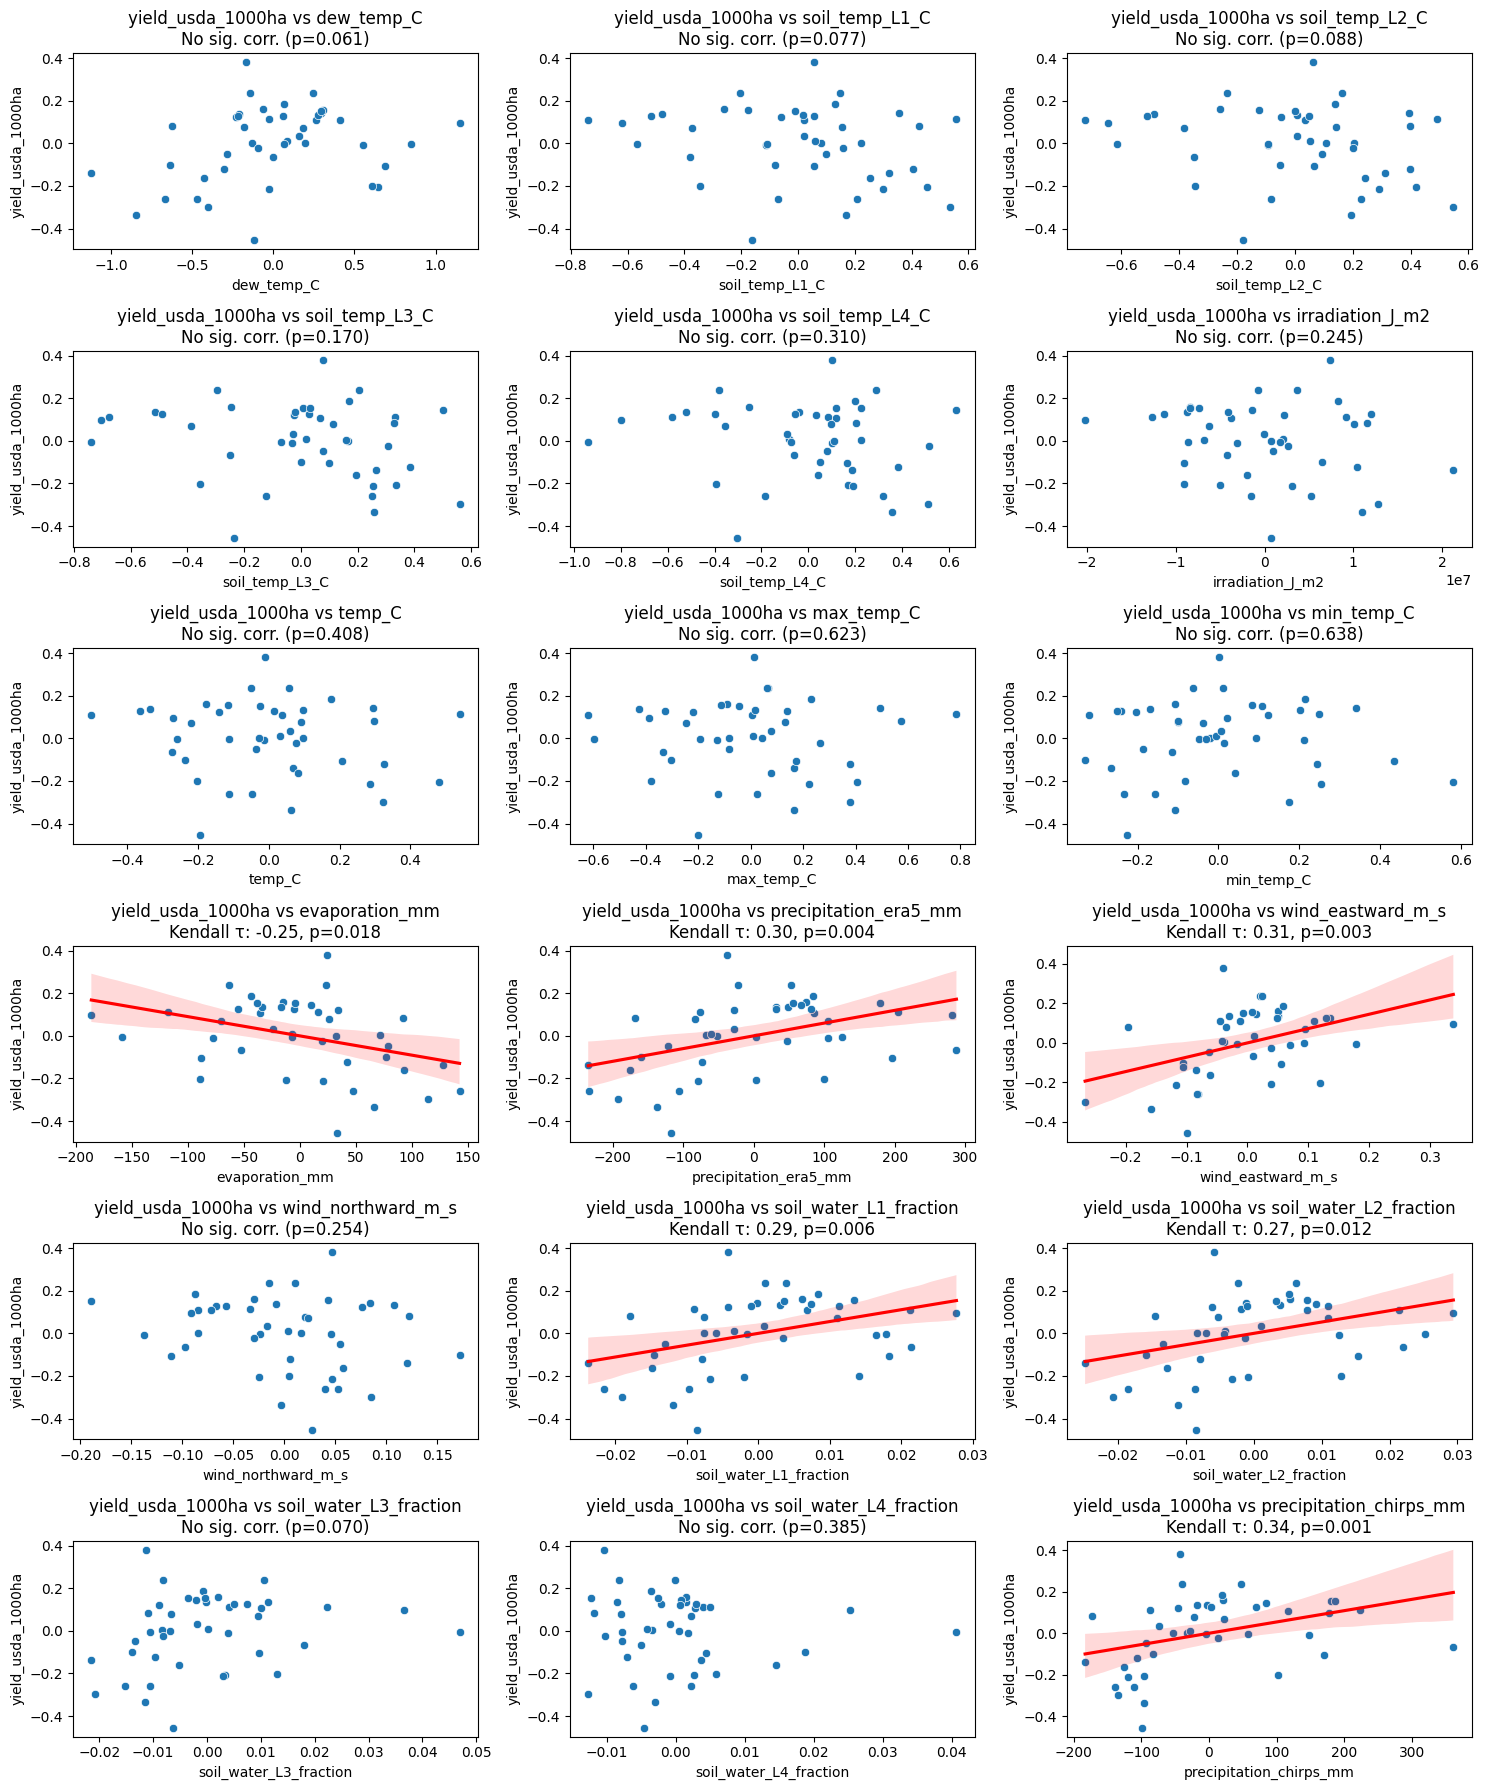

In [ ]:
# List of climate variables and target variable

df_fig = df_detrended.copy()

climate_vars = ['dew_temp_C',
       'soil_temp_L1_C', 'soil_temp_L2_C', 'soil_temp_L3_C', 'soil_temp_L4_C',
       'irradiation_J_m2', 'temp_C', 'max_temp_C', 'min_temp_C',
       'evaporation_mm', 'precipitation_era5_mm', 'wind_eastward_m_s',
       'wind_northward_m_s', 'soil_water_L1_fraction',
       'soil_water_L2_fraction', 'soil_water_L3_fraction',
       'soil_water_L4_fraction', 'precipitation_chirps_mm']

target_var = 'yield_usda_1000ha'  # Dependent variable

# Define the grid size (e.g., 2 rows, 3 columns for 6 variables)
n_vars = len(climate_vars)
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(n_vars / n_cols))  # Number of rows, calculated based on number of variables

# Create subplots grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_vars))  # Adjust size accordingly
axs = axs.flatten()  # Flatten to easily iterate over the axes

# Loop over the climate variables and create scatter plots in each subplot
for i, var in enumerate(climate_vars):
    # Calculate Kendall correlation and p-value
    tau, p_value = kendalltau(df_fig[var], df_fig[target_var])

    # Plot scatter plot
    sns.scatterplot(x=df_fig[var], y=df_fig[target_var], ax=axs[i])

    # Add trend line only if the correlation is significant (p < 0.05)
    if p_value < 0.05:
        sns.regplot(x=df_fig[var], y=df_fig[target_var], ax=axs[i],
                    scatter=False, line_kws={"color": "red"})  # Add trend line

    # Add title with Kendall correlation if significant
    if p_value < 0.05:
        axs[i].set_title(f'{target_var} vs {var}\nKendall τ: {tau:.2f}, p={p_value:.3f}')
    else:
        axs[i].set_title(f'{target_var} vs {var}\nNo sig. corr. (p={p_value:.3f})')

    axs[i].set_xlabel(var)
    axs[i].set_ylabel(target_var)

# Remove any unused subplots if the number of variables doesn't fill the grid
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## 6. Check colinearity

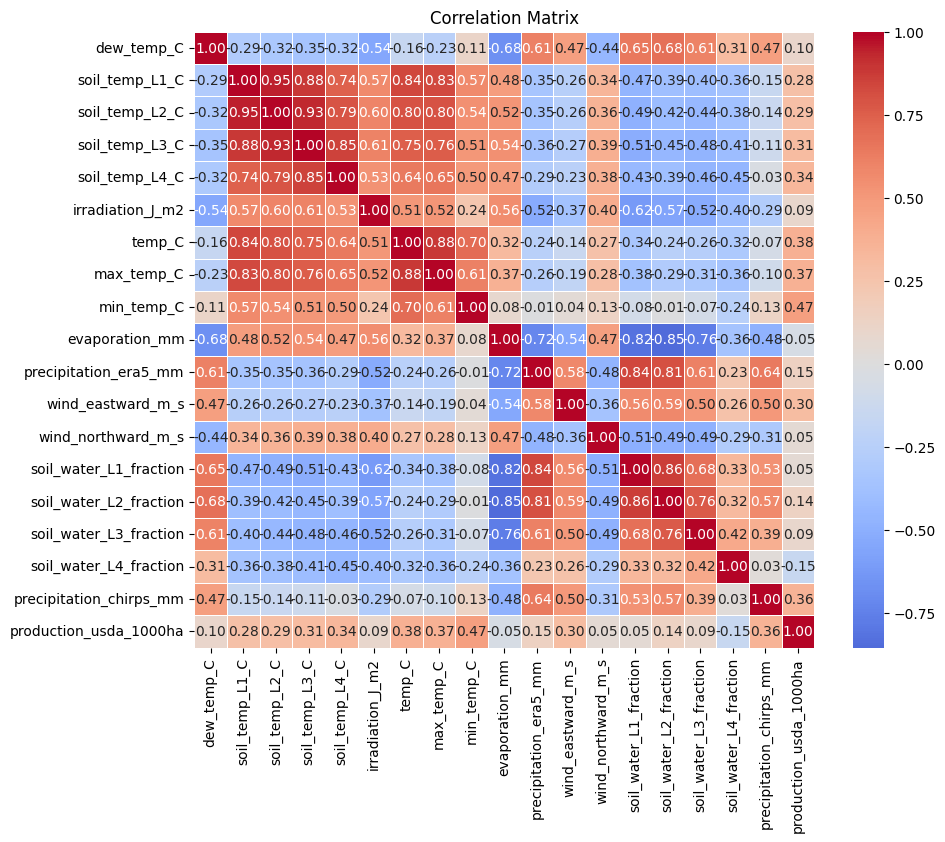

Variables with high correlation (|r| > 0.8):
{'soil_temp_L4_C', 'soil_water_L2_fraction', 'temp_C', 'soil_temp_L2_C', 'max_temp_C', 'soil_temp_L3_C', 'soil_water_L1_fraction'}
Variables to include in the model: ['dew_temp_C', 'soil_temp_L1_C', 'irradiation_J_m2', 'min_temp_C', 'evaporation_mm', 'precipitation_era5_mm', 'wind_eastward_m_s', 'wind_northward_m_s', 'soil_water_L3_fraction', 'soil_water_L4_fraction', 'precipitation_chirps_mm']


In [ ]:
# List of climate variables and target variable
climate_vars = ['dew_temp_C',
       'soil_temp_L1_C', 'soil_temp_L2_C', 'soil_temp_L3_C', 'soil_temp_L4_C',
       'irradiation_J_m2', 'temp_C', 'max_temp_C', 'min_temp_C',
       'evaporation_mm', 'precipitation_era5_mm', 'wind_eastward_m_s',
       'wind_northward_m_s', 'soil_water_L1_fraction',
       'soil_water_L2_fraction', 'soil_water_L3_fraction',
       'soil_water_L4_fraction', 'precipitation_chirps_mm']

target_var = 'production_usda_1000ha'

# Create a DataFrame with only climate variables and target variable
data = filtered_df[climate_vars + [target_var]]

# Calculate the correlation matrix
corr_matrix = data.corr(method='kendall')  # Using Kendall for consistency

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated variables
threshold = 0.8
high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            varname = corr_matrix.columns[i]
            high_corr_vars.add(varname)

print("Variables with high correlation (|r| > {}):".format(threshold))
print(high_corr_vars)

# Drop highly correlated variables from the dataset
reduced_vars = [var for var in climate_vars if var not in high_corr_vars]
print("Variables to include in the model:", reduced_vars)

# Create a reduced DataFrame without highly correlated variables
reduced_data = filtered_df[reduced_vars + [target_var]]

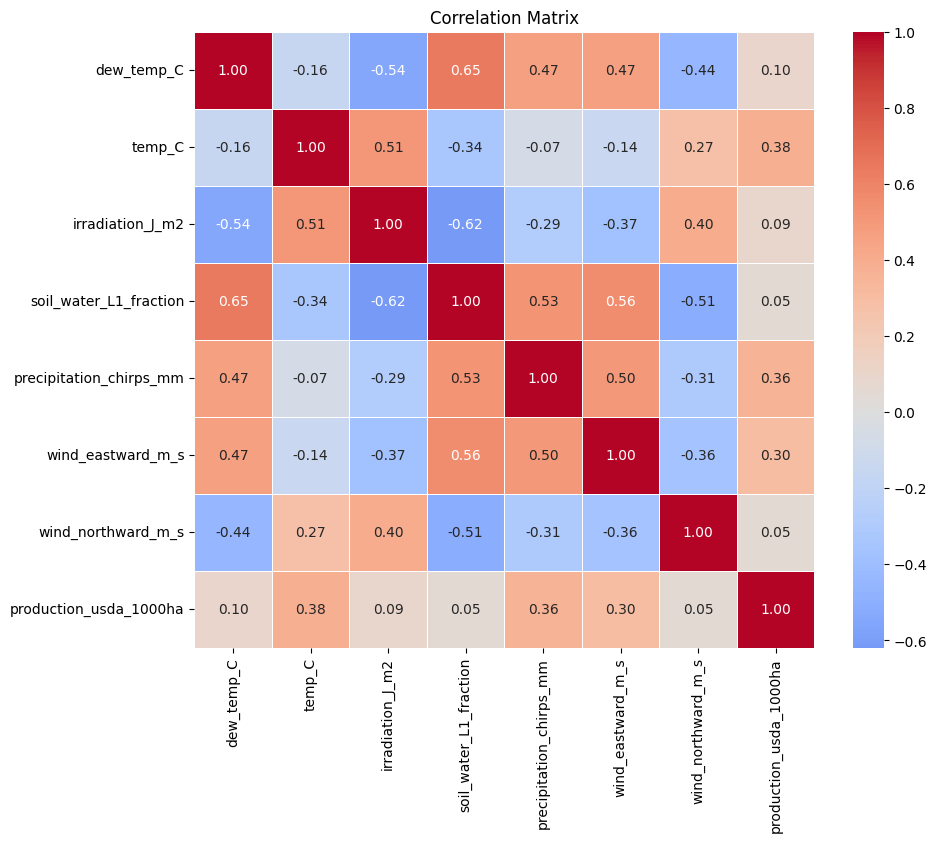

Variables with high correlation (|r| > 0.8):
set()
Variables to include in the model: ['dew_temp_C', 'temp_C', 'irradiation_J_m2', 'soil_water_L1_fraction', 'precipitation_chirps_mm', 'wind_eastward_m_s', 'wind_northward_m_s']


In [ ]:
# List of climate variables and target variable
climate_vars = ['dew_temp_C', 'temp_C', 'irradiation_J_m2', 'soil_water_L1_fraction', 'precipitation_chirps_mm', 'wind_eastward_m_s', 'wind_northward_m_s']

target_var = 'production_usda_1000ha'

# Create a DataFrame with only climate variables and target variable
data = filtered_df[climate_vars + [target_var]]

# Calculate the correlation matrix
corr_matrix = data.corr(method='kendall')  # Using Kendall for consistency

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated variables
threshold = 0.8
high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            varname = corr_matrix.columns[i]
            high_corr_vars.add(varname)

print("Variables with high correlation (|r| > {}):".format(threshold))
print(high_corr_vars)

# Drop highly correlated variables from the dataset
reduced_vars = [var for var in climate_vars if var not in high_corr_vars]
print("Variables to include in the model:", reduced_vars)

# Create a reduced DataFrame without highly correlated variables
reduced_data = filtered_df[reduced_vars + [target_var]]